In [1]:
import random
from quantumnet.components import Network, Host, Controller
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

Hosts inicializados
Canais inicializados
Pares EPRs adicionados
Topologia configurada com sucesso para slices!


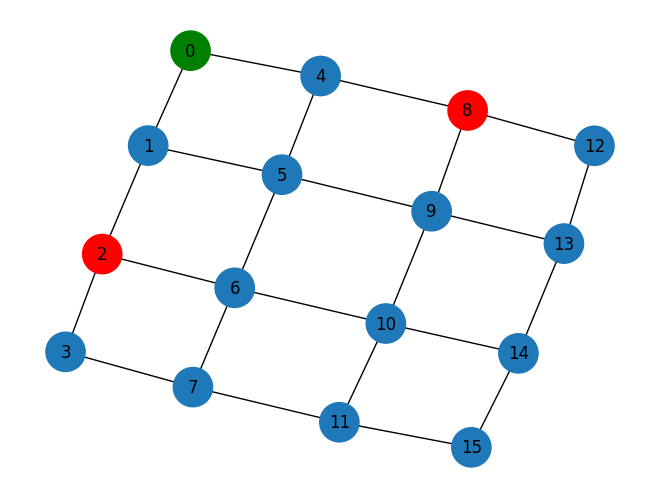

Final Slice 1 Paths: [[8, 4, 0]]
Final Slice 2 Paths: [[2, 6, 5, 4, 0]]


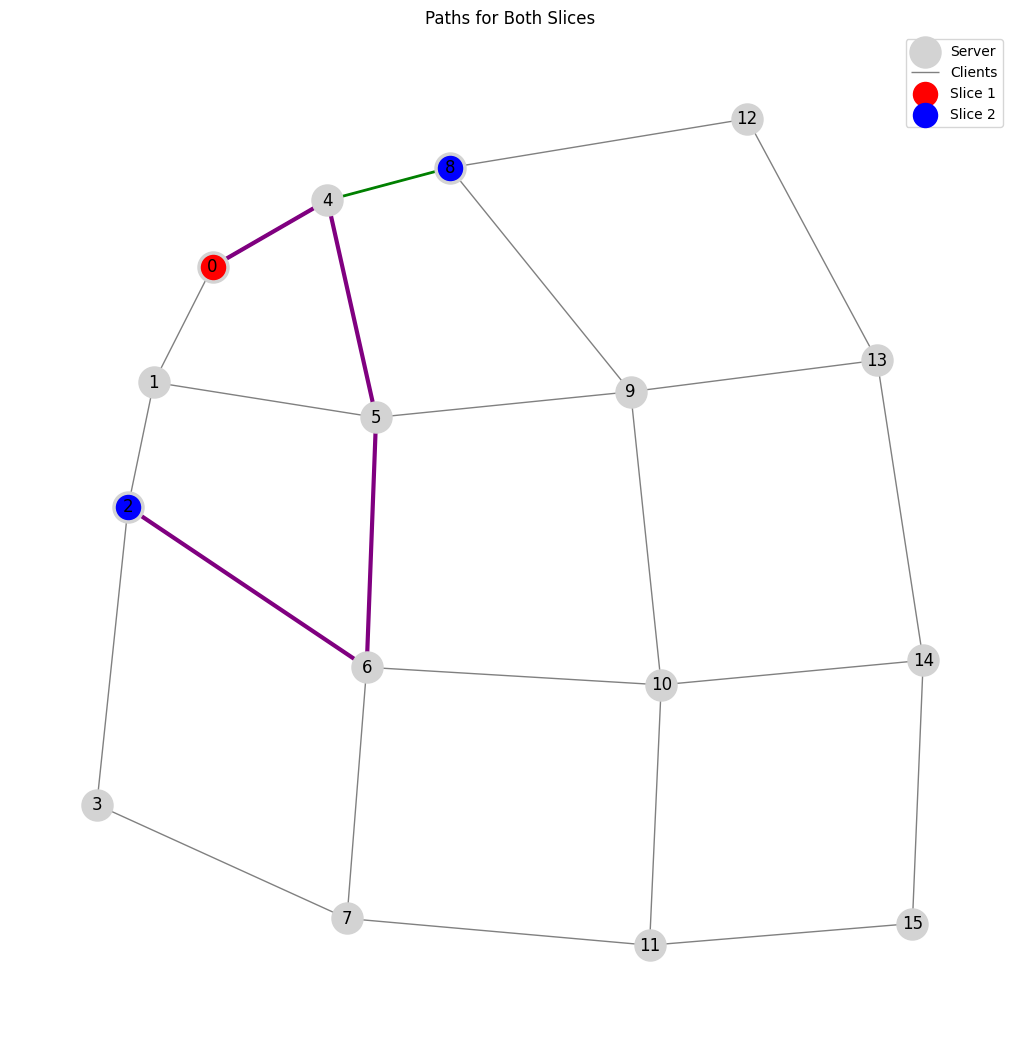

In [2]:
rede = Network()
controlador = Controller(rede)

# Configura uma grade 4x4
clients = [8, 2]
server = 0
rede.set_topology_for_slices(graph_type='grade', dimensions=(4, 4), clients=clients, server=server)


rede.draw()

# Executa a simulação de slices
rede.run_slice_simulation(clients=clients, server=server)
Logger.activate(Logger)



In [3]:
slice_1_paths = rede.final_slice_1_paths  
slice_2_paths = rede.final_slice_2_paths  

controlador.initialize_slices(network=rede, clients=[14,2], server=0, protocols=["BFK_BQC", "AC_BQC"], slice_1_paths=slice_1_paths, slice_2_paths=slice_2_paths)

for _ in range(3):
    protocol = random.choice(["BFK_BQC", "AC_BQC"])  
    if protocol == "BFK_BQC":
        alice_id = 8
        slice_path = rede.final_slice_1_paths[0]  
    elif protocol == "AC_BQC":
        alice_id = 2
        slice_path = rede.final_slice_2_paths[0]  
    bob_id = 0
    num_qubits = random.randint(3, 6)
    num_gates = random.randint(10, 20)

    # Passa o slice_path para garantir a rota correta na requisição
    rede.generate_request_slice(alice_id, bob_id, num_qubits, num_gates, protocol=protocol, slice_path=slice_path,scenario=2)

scheduled_timeslots = rede.send_requests_to_controller(controlador)
slice_paths = controlador.slices  
rede.execute_scheduled_requests(scheduled_timeslots)


2024-12-17 00:28:03,479: Slice slice_1 configurado para protocolo BFK_BQC com rotas: {'client': [8, 4, 0]}
2024-12-17 00:28:03,482: Slice slice_2 configurado para protocolo AC_BQC com rotas: {'client': [2, 6, 5, 4, 0]}
2024-12-17 00:28:03,677: Circuito aleatório gerado com 3 qubits e 14 portas. Instruções sobre o circuito.
2024-12-17 00:28:03,678: Instrução: {'operation': 't', 'qubits': [0]}
2024-12-17 00:28:03,679: Instrução: {'operation': 't', 'qubits': [1]}
2024-12-17 00:28:03,680: Instrução: {'operation': 'x', 'qubits': [1]}
2024-12-17 00:28:03,681: Instrução: {'operation': 'swap', 'qubits': [2, 0]}
2024-12-17 00:28:03,682: Instrução: {'operation': 'cz', 'qubits': [0, 2]}
2024-12-17 00:28:03,683: Instrução: {'operation': 'x', 'qubits': [1]}
2024-12-17 00:28:03,684: Instrução: {'operation': 'y', 'qubits': [1]}
2024-12-17 00:28:03,685: Instrução: {'operation': 't', 'qubits': [1]}
2024-12-17 00:28:03,685: Instrução: {'operation': 'swap', 'qubits': [2, 1]}
2024-12-17 00:28:03,686: Inst

     ┌───┐                                   ┌───┐┌───┐
q_0: ┤ T ├──────X──■────────────────────■────┤ X ├┤ T ├
     ├───┤┌───┐ │  │ ┌───┐┌───┐┌───┐    │    └─┬─┘├───┤
q_1: ┤ T ├┤ X ├─┼──┼─┤ X ├┤ Y ├┤ T ├─X──■──■───┼──┤ Z ├
     └───┘└───┘ │  │ └───┘└───┘└───┘ │     │   │  └───┘
q_2: ───────────X──■─────────────────X─────■───■───────
                                                       
          ┌───┐┌───┐     ┌───┐┌───┐   
q_0: ──X──┤ T ├┤ X ├─────┤ X ├┤ Y ├─X─
       │  ├───┤└─┬─┘     └─┬─┘└───┘ │ 
q_1: ──X──┤ Y ├──┼─────────┼────────┼─
     ┌───┐└───┘  │         │        │ 
q_2: ┤ X ├───────┼────X────┼────────┼─
     ├───┤┌───┐  │    │    │        │ 
q_3: ┤ Z ├┤ X ├──┼────X────┼────────┼─
     └───┘└───┘  │  ┌───┐  │  ┌───┐ │ 
q_4: ────────────■──┤ Z ├──■──┤ T ├─X─
                    └───┘     └───┘   


2024-12-17 00:28:03,847: Circuito aleatório gerado com 5 qubits e 13 portas. Instruções sobre o circuito.
2024-12-17 00:28:03,848: Instrução: {'operation': 'swap', 'qubits': [0, 1]}
2024-12-17 00:28:03,848: Instrução: {'operation': 't', 'qubits': [0]}
2024-12-17 00:28:03,849: Instrução: {'operation': 'cx', 'qubits': [4, 0]}
2024-12-17 00:28:03,851: Instrução: {'operation': 'z', 'qubits': [4]}
2024-12-17 00:28:03,852: Instrução: {'operation': 'z', 'qubits': [3]}
2024-12-17 00:28:03,853: Instrução: {'operation': 'cx', 'qubits': [4, 0]}
2024-12-17 00:28:03,854: Instrução: {'operation': 't', 'qubits': [4]}
2024-12-17 00:28:03,855: Instrução: {'operation': 'x', 'qubits': [2]}
2024-12-17 00:28:03,856: Instrução: {'operation': 'y', 'qubits': [0]}
2024-12-17 00:28:03,857: Instrução: {'operation': 'swap', 'qubits': [4, 0]}
2024-12-17 00:28:03,859: Instrução: {'operation': 'y', 'qubits': [1]}
2024-12-17 00:28:03,860: Instrução: {'operation': 'x', 'qubits': [3]}
2024-12-17 00:28:03,861: Instrução

             ┌───┐     ┌───┐┌───┐
q_0: ────────┤ X ├─────┤ X ├┤ T ├
             └─┬─┘┌───┐└─┬─┘└───┘
q_1: ──────X───┼──┤ H ├──┼───────
     ┌───┐ │   │  ├───┤  │       
q_2: ┤ S ├─┼───┼──┤ T ├──┼───────
     └───┘ │   │  └───┘  │  ┌───┐
q_3: ──────┼───┼─────────■──┤ T ├
           │   │  ┌───┐     └───┘
q_4: ──────┼───■──┤ S ├──X───────
           │      └───┘  │       
q_5: ──────X─────────────X───────
                                 
Todas as requisições foram enviadas para o controlador.
Pares EPRs adicionados
Hosts inicializados


2024-12-17 00:28:04,047: Pares EPRs restantes no segmento 4 -> 0: 15
2024-12-17 00:28:04,048: Fidelidade final: 0.9809 (F_qubit: 0.9848 * F_rota: 0.9960)
2024-12-17 00:28:04,049: Foram utilizados 6 pares EPRs ao longo da transmissão.
2024-12-17 00:28:04,050: Estado final dos EPRs restantes na rota:
2024-12-17 00:28:04,052: Segmento 8 -> 4: 15 pares EPRs restantes.
2024-12-17 00:28:04,053: Segmento 4 -> 0: 15 pares EPRs restantes.
2024-12-17 00:28:04,054: Transmissão de 3 qubits entre 8 e 0 concluída com sucesso.
2024-12-17 00:28:04,055: Timeslot 7.
2024-12-17 00:28:04,056: Servidor 0 criou um estado de brickwork com 3 qubits.
2024-12-17 00:28:04,057: Rodada 1: Cliente 8 envia ângulo de medição 2.4712645021190407 ao servidor.
2024-12-17 00:28:04,058: Timeslot 8.Servidor realiza a medição do qubit.
2024-12-17 00:28:04,059: Servidor 0 realizou a medição do qubit na base 2.4712645021190407, com resultado 1.
2024-12-17 00:28:04,061: Timeslot 9.Cliente ajusta a próxima base de medição.
2024-

Pares EPRs adicionados
Hosts inicializados


2024-12-17 00:28:04,579: Pares EPRs restantes no segmento 5 -> 4: 23
2024-12-17 00:28:04,580: Pares EPRs restantes no segmento 4 -> 0: 26
2024-12-17 00:28:04,581: Fidelidade final: 0.9680 (F_qubit: 0.9836 * F_rota: 0.9841)
2024-12-17 00:28:04,581: Fidelidade do EPR 2->6: 0.995009990004999
2024-12-17 00:28:04,583: Fidelidade do EPR 6->5: 0.995009990004999
2024-12-17 00:28:04,583: Fidelidade do EPR 5->4: 0.995009990004999
2024-12-17 00:28:04,585: Fidelidade do EPR 4->0: 0.995009990004999
2024-12-17 00:28:04,585: Produto das fidelidades para rota [2, 6, 5, 4, 0]: 0.9801888648295347
2024-12-17 00:28:04,586: Fidelidade atual da rota: 0.9801888648295347
2024-12-17 00:28:04,587: Pares EPRs restantes no segmento 2 -> 6: 22
2024-12-17 00:28:04,587: Pares EPRs restantes no segmento 6 -> 5: 22
2024-12-17 00:28:04,588: Pares EPRs restantes no segmento 5 -> 4: 22
2024-12-17 00:28:04,588: Pares EPRs restantes no segmento 4 -> 0: 25
2024-12-17 00:28:04,590: Fidelidade final: 0.9382 (F_qubit: 0.9572 *

In [4]:
controlador.print_report(scheduled_timeslots, slice_paths)


=== Relatório de Agendamento e Execução de Requisições ===

Timeslot 1:
  - Alice ID: 8, Bob ID: 0, Protocolo: BFK_BQC, Nº de Qubits: 3, Caminho do slice_1: {'client': [8, 4, 0]}
  - Alice ID: 2, Bob ID: 0, Protocolo: AC_BQC, Nº de Qubits: 5, Caminho do slice_2: {'client': [2, 6, 5, 4, 0]}
------------------------------------------------------------
Timeslot 2:
  - Alice ID: 2, Bob ID: 0, Protocolo: AC_BQC, Nº de Qubits: 6, Caminho do slice_2: {'client': [2, 6, 5, 4, 0]}
------------------------------------------------------------

=== Fim do Relatório ===



In [5]:
rede.get_total_useds_eprs()

2024-12-17 00:28:04,855: Eprs criados na camada PhysicalLayer: 44
2024-12-17 00:28:04,856: Eprs usados na camada LinkLayer: 0
2024-12-17 00:28:04,858: Eprs usados na camada NetworkLayer: 0
2024-12-17 00:28:04,860: Eprs usados na camada ApplicationLayer: 94


138

In [6]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9391


0.939126852419004

In [7]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
0.9988
0.8972
0.9809
0.9622
0.9392
0.9439
0.9155
0.9426
0.9565
0.9335
0.9383
0.9100
0.9370
0.9231
0.9370
0.9135
0.9511
0.9680
0.9382
0.9166
0.9305
0.9071
0.9444
0.9612
0.9317
